 # Goal
 
 Jacobo de la Cuesta-Zuluaga
 
 * summarize results of the assembly pipeline
 
 > `90% completion + < 10% redundancy ~= Golden`

# Var

Note that the file path was changed. It is now `/ebio/abt3_projects/vadinCA11/data/metagenome/HiSeqRuns83-91/incorrect_sample_sheet/LLMGA/`

In [43]:
work_dir = '/ebio/abt3_projects/vadinCA11/data/metagenome/LLMGA/HiSeqRun83-91/summary/'

results_dir = '/ebio/abt3_projects/vadinCA11/data/metagenome/LLMGA/'
das_tool_dir = '/ebio/abt3_projects/vadinCA11/data/metagenome/LLMGA/HiSeqRun83-91/bin_refine/DAS_Tool/'
sourmash_dir = '/ebio/abt3_projects/vadinCA11/data/metagenome/LLMGA/HiSeqRun83-91/sourmash/'
checkm_dir = '/ebio/abt3_projects/vadinCA11/data/metagenome/LLMGA/HiSeqRun83-91/checkm/'
contig_db_file = '/ebio/abt3_projects/vadinCA11/data/metagenome/LLMGA/HiSeqRun83-91/anvio/coassemble.db'

conda_env = 'anvio'

# Init

In [2]:
library(dplyr)
library(tidyr)
library(ggplot2)
source('/ebio/abt3_projects/vadinCA11/code/init.R')

In [39]:
make_dir(work_dir)
setwd(work_dir)

Directory already exists: /ebio/abt3_projects/vadinCA11/data/metagenome/LLMGA/HiSeqRun83-91/summary/ 


# DAS tool

In [10]:
f = file.path(das_tool_dir, 'bins_DASTool_summary.txt')
dts = read.delim(f, sep='\t')
dts %>% status

[1] 317  13


bin,uniqueBacSCGs,redundantBacSCGs,uniqueArcSCGs,redundantArcSCGs,bacRatio,arcRatio,size,contigs,N50,binScore,SCG_completeness,SCG_redundancy
metabat2_low_PE.500,51,0,14,0,1,0.3684211,2917940,13,343543,1,100,0
metabat2_low_PE.468,51,0,14,0,1,0.3684211,2396688,59,67424,1,100,0
metabat2_low_PE.144,51,0,15,0,1,0.3947368,1950149,51,58624,1,100,0


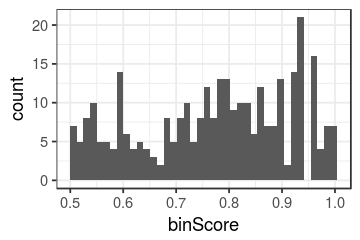

In [11]:
p = ggplot(dts, aes(binScore)) +
    geom_histogram(bins=40) +
    theme_bw()

options(repr.plot.height=2, repr.plot.width=3)
plot(p)

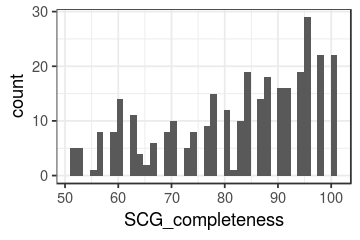

In [12]:
p = ggplot(dts, aes(SCG_completeness)) +
    geom_histogram(bins=40) +
    theme_bw()

options(repr.plot.height=2, repr.plot.width=3)
plot(p)

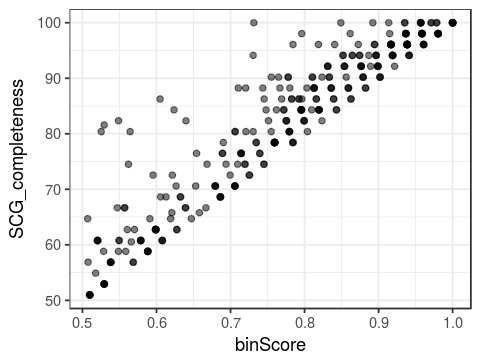

In [13]:
p = ggplot(dts, aes(binScore, SCG_completeness)) +
    geom_point(alpha=0.5) +
    theme_bw()

options(repr.plot.height=3, repr.plot.width=4)
plot(p)

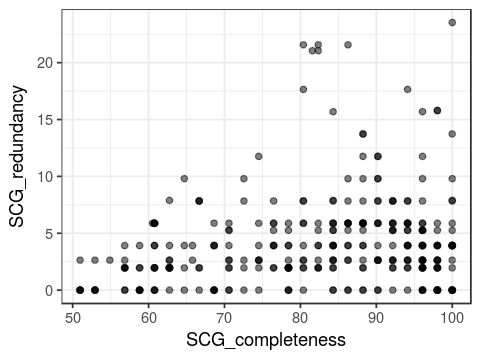

In [14]:
p = ggplot(dts, aes(SCG_completeness, SCG_redundancy)) +
    geom_point(alpha=0.5) +
    theme_bw()

options(repr.plot.height=3, repr.plot.width=4)
plot(p)

In [16]:
# high quality bins
dts_gold = das_sum %>% 
    filter(SCG_completeness >= 90, SCG_redundancy < 10) 

dts_gold %>% status

[1] 115  13


bin,uniqueBacSCGs,redundantBacSCGs,uniqueArcSCGs,redundantArcSCGs,bacRatio,arcRatio,size,contigs,N50,binScore,SCG_completeness,SCG_redundancy
metabat2_low_PE.500,51,0,14,0,1,0.3684211,2917940,13,343543,1,100,0
metabat2_low_PE.468,51,0,14,0,1,0.3684211,2396688,59,67424,1,100,0
metabat2_low_PE.144,51,0,15,0,1,0.3947368,1950149,51,58624,1,100,0


In [23]:
dts_gold_s = dts_gold %>%
    dplyr::select(bin, contigs, N50, binScore, SCG_completeness, SCG_redundancy) %>%
    gather(category, value, -bin)

dts_gold_s %>% status

[1] 575   3


bin,category,value
metabat2_low_PE.500,contigs,13
metabat2_low_PE.468,contigs,59
metabat2_low_PE.144,contigs,51


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


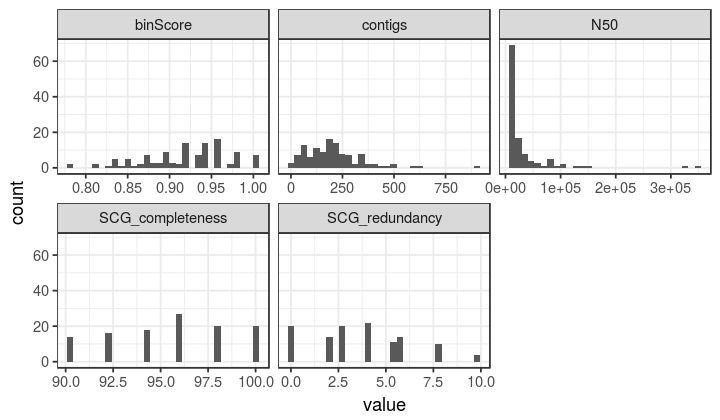

In [26]:
p = ggplot(dts_gold_s, aes(value)) +
    geom_histogram() +
    facet_wrap(~ category, scales='free_x') +
    theme_bw()

options(repr.plot.height=3.5, repr.plot.width=6)
plot(p)

# Sourmash

In [28]:
f = file.path(sourmash_dir, 'DASTool_scaffolds2bin_sm-lca-clsfy.txt')
sm = read.delim(f, sep='\t')
sm %>% status

[1] 317   9


ID,status,superkingdom,phylum,class,order,family,genus,species
/ebio/abt3_projects/vadinCA11/data/metagenome/LLMGA/HiSeqRun83-91/bin_refine/DAS_Tool//bins_DASTool_bins/maxbin2_high_prob.004.contigs.fa,nomatch,,,,,,,
/ebio/abt3_projects/vadinCA11/data/metagenome/LLMGA/HiSeqRun83-91/bin_refine/DAS_Tool//bins_DASTool_bins/maxbin2_high_prob.010.contigs.fa,nomatch,,,,,,,
/ebio/abt3_projects/vadinCA11/data/metagenome/LLMGA/HiSeqRun83-91/bin_refine/DAS_Tool//bins_DASTool_bins/maxbin2_high_prob.020.contigs.fa,nomatch,,,,,,,


In [30]:
sm %>%
    filter(superkingdom == 'Archaea')

ID,status,superkingdom,phylum,class,order,family,genus,species
/ebio/abt3_projects/vadinCA11/data/metagenome/LLMGA/HiSeqRun83-91/bin_refine/DAS_Tool//bins_DASTool_bins/maxbin2_low_prob.159.contigs.fa,found,Archaea,Euryarchaeota,Methanobacteria,Methanobacteriales,Methanobacteriaceae,Methanobrevibacter,Methanobrevibacter smithii
/ebio/abt3_projects/vadinCA11/data/metagenome/LLMGA/HiSeqRun83-91/bin_refine/DAS_Tool//bins_DASTool_bins/metabat2_low_PE.478.contigs.fa,disagree,Archaea,Euryarchaeota,,,,,


# CheckM

# 16S check

In [47]:
# listing available genes
cmd = c(
    'anvi-get-sequences-for-hmm-hits',
    '-c', contig_db_file, 
    '--hmm-source Ribosomal_RNAs',
    '--list-available-gene-names'
)
cmd = paste(cmd, collapse=' ')
bash_job(cmd, conda_env, stderr=TRUE)

[1] "* Ribosomal_RNAs [type: Ribosomal_RNAs]: Archaeal_16S_rRNA, Archaeal_23S_rRNA,"
[2] "Archaeal_5S_rRNA, Bacterial_16S_rRNA, Bacterial_23S_rRNA, Bacterial_5S_rRNA,"  
[3] "Eukaryotic_28S_rRNA, Eukaryotic_5S_rRNA, Eukaryotic_5_8S_rRNA,"                
[4] "Mitochondrial_12S_rRNA, Mitochondrial_16S_rRNA, Archaeal_5_8S_rRNA"            
[5] ""                                                                              
[6] ""

In [60]:
# writing out genes
archaeal_rRNA_file = file.path(work_dir, 'archaeal_rRNA.fna')
cmd = c(
    'anvi-get-sequences-for-hmm-hits',
    '-c', contig_db_file, 
    '--hmm-source Ribosomal_RNAs',
    '--gene Archaeal_16S_rRNA,Archaeal_23S_rRNA,Archaeal_5S_rRNA,Archaeal_5_8S_rRNA',
    '-o', archaeal_16S_file
)
cmd = paste(cmd, collapse=' ')
cmd
#bash_job(cmd, conda_env)

[1] "anvi-get-sequences-for-hmm-hits -c /ebio/abt3_projects/vadinCA11/data/metagenome/LLMGA/HiSeqRun83-91/anvio/coassemble.db --hmm-source Ribosomal_RNAs --gene Archaeal_16S_rRNA,Archaeal_23S_rRNA,Archaeal_5S_rRNA,Archaeal_5_8S_rRNA -o /ebio/abt3_projects/vadinCA11/data/metagenome/LLMGA/HiSeqRun83-91/summary//archaeal_16SrRNA.fna"

In [59]:
# how many sequences?
cmd = c('grep', '">"', archaeal_rRNA_file)
cmd = paste(cmd, collapse=' ')
bash_job(cmd, conda_env) %>% paste(collapse='\n') %>% cat

Warning message:
“running command ''bash' -c "source activate anvio; grep ">" /ebio/abt3_projects/vadinCA11/data/metagenome/LLMGA/HiSeqRun83-91/summary//archaeal_rRNA.fna" 2>/dev/null' had status 2”